# Different Neural Network on MNIST data.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.WARN)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

## 5 layers neural network implemented in Tensorflow.

In [0]:
n_input = 784
hidden_layer_1 = 650
hidden_layer_2 = 512
hidden_layer_3 = 450
hidden_layer_4 = 256
output_layer = 10

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)


In [0]:
weight_relu = {'h1': tf.Variable(tf.random_normal([n_input,hidden_layer_1], stddev=0.0504, mean=0)),
              'h2': tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2], stddev=0.0554, mean=0)),
              'h3': tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3], stddev=0.0624, mean=0)),
              'h4': tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4], stddev=0.0665, mean=0)),
              'output_layer': tf.Variable(tf.random_normal([hidden_layer_4, output_layer], stddev=0.0882, mean=0))
             }

biases = {
    'b1': tf.Variable(tf.random_normal([hidden_layer_1])),             
    'b2': tf.Variable(tf.random_normal([hidden_layer_2])),
    'b3': tf.Variable(tf.random_normal([hidden_layer_3])),
    'b4': tf.Variable(tf.random_normal([hidden_layer_4])),
    'output_layer': tf.Variable(tf.random_normal([output_layer]))
}

In [0]:
training_epochs = 100
learning_rate = 0.001
batch_size = 100
display_step = 10

In [0]:
def multilayer_perceptron(x, weights, biases):
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
    tf.summary.histogram("relu1", layer_1_drop)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    tf.summary.histogram("relu2", layer_2_drop)
    print( 'layer_2:', layer_2.get_shape(), 'W[h3]:', weights['h3'].get_shape(), 'b[h3]:', biases['b3'].get_shape())
    layer_3 = tf.add(tf.matmul(layer_2_drop, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3_drop = tf.nn.dropout(layer_3, keep_prob)
    tf.summary.histogram("relu3", layer_3_drop)
    print( 'layer_3:', layer_3.get_shape(), 'W[h4]:', weights['h4'].get_shape(), 'b[h4]:', biases['b4'].get_shape())
    layer_4 = tf.add(tf.matmul(layer_3_drop, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    layer_4_drop = tf.nn.dropout(layer_4, keep_prob)    
    tf.summary.histogram("relu4", layer_4_drop)
    print( 'layer_4:', layer_4.get_shape(), 'W[out]:', weights['output_layer'].get_shape(), 'b[out]:', biases['output_layer'].get_shape())
    output_layer = tf.add(tf.matmul(layer_4_drop, weights['output_layer']), biases['output_layer'])
    output_layer = tf.nn.sigmoid(output_layer)
    print('out_layer:',output_layer.get_shape())
    tf.summary.histogram("sigmoid1", output_layer)
    return output_layer    
    

x: (?, 784) W[h1]: (784, 650) b[h1]: (650,)
layer_1: (?, 650) W[h2]: (650, 512) b[h2]: (512,)
layer_2: (?, 512) W[h3]: (512, 450) b[h3]: (450,)
layer_3: (?, 450) W[h4]: (450, 256) b[h4]: (256,)
layer_4: (?, 256) W[out]: (256, 10) b[out]: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.786753575 test cost=1.722067765
Epoch: 0011 train cost=1.521309910 test cost=1.500240673
Epoch: 0021 train cost=1.532546067 test cost=1.508183907
Epoch: 0031 train cost=1.533204029 test cost=1.508277773
Epoch: 0041 train cost=1.541900626 test cost=1.513784866
Epoch: 0051 train cost=1.548889747 test cost=1.515797113
Epoch: 0061 train cost=1.549268461 test cost=1.518580600
Epoch: 0071 train cost=1.561041378 test cost=1.526748060
Epoch: 0081 train cost=1.581896796 test cost=1.540075176
Epoch: 0091 train cost=1.585400967 test cost=1.535948666
Accuracy: 0.9031


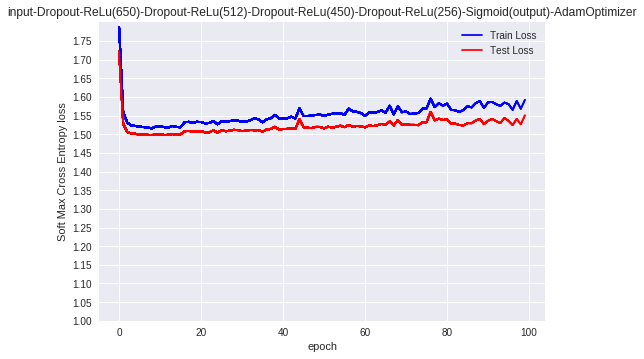

In [0]:
ydrop = multilayer_perceptron(x, weight_relu, biases)
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weight_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-Dropout-ReLu(650)-Dropout-ReLu(512)-Dropout-ReLu(450)-Dropout-ReLu(256)-Sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-Dropout-ReLu(650)-Dropout-ReLu(512)-Dropout-ReLu(450)-Dropout-ReLu(256)-Sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


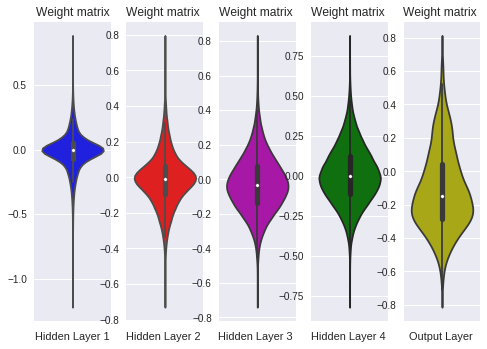

In [0]:
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
h3_w = w['h3'].flatten().reshape(-1,1)
h4_w = w['h4'].flatten().reshape(-1,1)
out_w = w['output_layer'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 5, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h3_w, color='m')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 4)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 layers neural network implemented in tensorflow

In [0]:
training_epochs = 25
learning_rate = 0.01
batch_size = 100
display_step = 1
input_layer = 784
hidden_layer_1 = 256
hidden_layer_2 = 64
output_layer = 10

In [0]:
x = tf.placeholder(tf.float32, [None, 784], name='input_data')
y_ = tf.placeholder(tf.float32, [None, 10], name='label_data')

In [0]:
weights_sgd = {
     'h1': tf.Variable(tf.random_normal([input_layer, hidden_layer_1], stddev=0.0504, mean=0), name='h1'),
     'h2': tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2], stddev=0.0882, mean=0), name='h2'),
     'output_layer': tf.Variable(tf.random_normal([hidden_layer_2, output_layer], stddev=0.1754, mean=0), name='h3')
}

biases = {
    'b1': tf.Variable(tf.random_normal([hidden_layer_1]), name='b1'),
    'b2': tf.Variable(tf.random_normal([hidden_layer_2]), name='b2'),
    'output_layer': tf.Variable(tf.random_normal([output_layer]), name='b3')
}

In [0]:
def multilayer_perceptron(x, weights, biases):
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1, name='layer_1')
    tf.summary.histogram("relu1", layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    scale_2 = tf.Variable(tf.ones([hidden_layer_2]))
    beta_2 = tf.Variable(tf.zeros([hidden_layer_2]))
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, 1e-3)
    layer_2 = tf.nn.relu(layer_2, name='layer_2')
    tf.summary.histogram("relu2", layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[output_layer]:', weights['output_layer'].get_shape(), 'b[output_layer]:', biases['output_layer'].get_shape())
    output_layer = tf.add(tf.matmul(layer_2, weights['output_layer']), biases['output_layer'])
    output_layer = tf.nn.sigmoid(output_layer, name='output_layer')
    tf.summary.histogram("sigmoid1", output_layer)
    print('out_layer:',output_layer.get_shape())
    
    return output_layer
        

x: (?, 784) W[h1]: (784, 256) b[h1]: (256,)
layer_1: (?, 256) W[h2]: (256, 64) b[h2]: (64,)
layer_2: (?, 64) W[output_layer]: (64, 10) b[output_layer]: (10,)
out_layer: (?, 10)
Instructions for updating:
Use tf.cast instead.
Epoch: 0001 train cost=1.526536773 test cost=1.522006498
Epoch: 0002 train cost=1.492868965 test cost=1.491926498
Epoch: 0003 train cost=1.485713073 test cost=1.488306795
Epoch: 0004 train cost=1.481816843 test cost=1.484100629
Epoch: 0005 train cost=1.480216858 test cost=1.484158875
Epoch: 0006 train cost=1.477493748 test cost=1.482253680
Epoch: 0007 train cost=1.476761064 test cost=1.481580958
Epoch: 0008 train cost=1.475635953 test cost=1.481987538
Epoch: 0009 train cost=1.473674065 test cost=1.480932757
Epoch: 0010 train cost=1.473262687 test cost=1.481114489
Epoch: 0011 train cost=1.473014956 test cost=1.479470807
Epoch: 0012 train cost=1.472183607 test cost=1.479854816
Epoch: 0013 train cost=1.471133271 test cost=1.479386240
Epoch: 0014 train cost=1.471264423

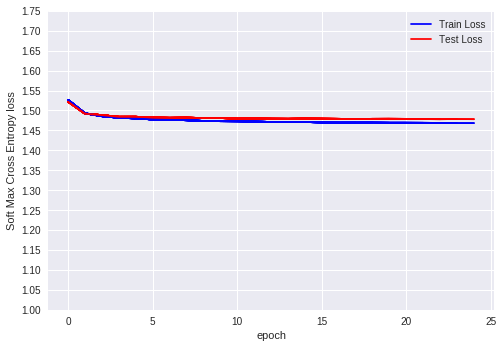

In [57]:
ydrop = multilayer_perceptron(x, weights_sgd, biases)
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05))

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
            
    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05))
    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


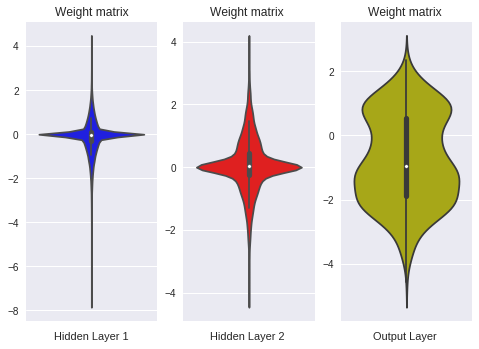

In [58]:
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['output_layer'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2 layers neural network implemented in tensorflow

In [0]:
training_epochs = 30
learning_rate = 0.001
batch_size = 100
display_step = 10
input_layer = 784
hidden_layer_1 = 512
output_layer = 10

In [0]:
x = tf.placeholder(tf.float32, [None, 784], name='input_data')
y_ = tf.placeholder(tf.float32, [None, 10], name='label_data')

In [0]:
weights_sgd = {
     'h1': tf.Variable(tf.random_normal([input_layer, hidden_layer_1], stddev=0.0504, mean=0)),
     'output_layer': tf.Variable(tf.random_normal([hidden_layer_1, output_layer], stddev=0.0618, mean=0))
  }
biases = {
    'b1': tf.Variable(tf.random_normal([hidden_layer_1])),
    'output_layer': tf.Variable(tf.random_normal([output_layer]))
  }

In [0]:
def multilayer_perceptron(x, weights, biases):
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1, name='layer_1')
    print( 'layer_1:', layer_1.get_shape(), 'W[output_layer]:', weights['output_layer'].get_shape(), 'b[output_layer]:', biases['output_layer'].get_shape())      
    output_layer = tf.add(tf.matmul(layer_1, weights['output_layer']), biases['output_layer'])
    output_layer = tf.nn.sigmoid(output_layer, name='output_layer')
    print('out_layer:',output_layer.get_shape())
    
    return output_layer

In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, y, y_1, ax, ticks, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
    plt.yticks(ticks)
    fig.canvas.draw()

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[output_layer]: (512, 10) b[output_layer]: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=2.325635947 test cost=2.324964037
Epoch: 0011 train cost=1.966256236 test cost=1.959826537
Epoch: 0021 train cost=1.832520338 test cost=1.825113028
Accuracy: 0.8292


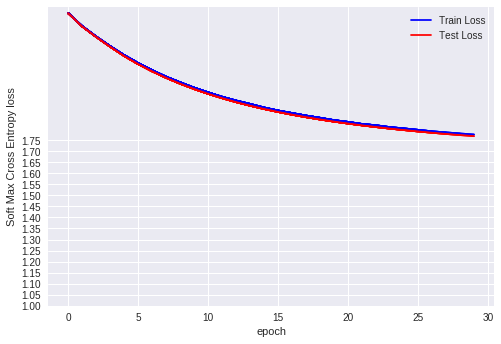

In [51]:
ydrop = multilayer_perceptron(x, weights_sgd, biases)
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
optimizer_drop_adam = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.01).minimize(cost_drop)


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_adam, cost_drop, weights_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05))

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
            
    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05))
    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


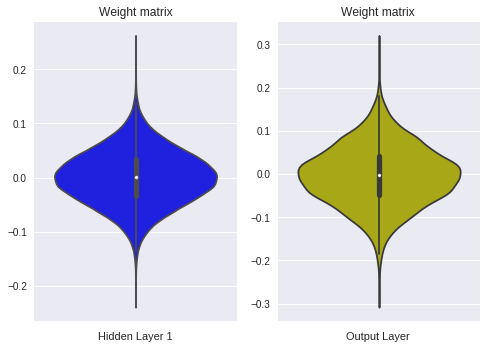

In [52]:
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
out_w = w['output_layer'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 2, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()